# Import library

In [44]:
import numpy as np
import natsort
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive
from glob import glob

import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds

from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [45]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image_processing

In [46]:
class image_processing():
    def __init__(self, path1, path2, is_train):
        self.rgb_img_path = path1
        self.patch_img_path = path2
        self.is_train = is_train
        self.crop_margin(self.rgb_img_path,is_train)

    def crop_margin(self,path,is_train):
        file_count = 0
        for file_path in path:
            file_count += 1
            #print(file_count,"번 째 사진 전처리중. . .")
            img = cv2.imread(file_path)
            #print("여백 제거 전 : ", img.shape)
            self.crop_rgb_img = img[:,25:-25,:]
            #print("여백 제거 후 : ", self.crop_rgb_img.shape)
            self.image_5000 = self.crop_rgb_img[:5000,:5000,:]
            #print("5000 size로 crop : " , self.image_5000.shape)
            self. make_patch_img(self.image_5000, file_count, is_train)
            #print("")
        print(file_count,"장 전처리 완료.")


    def make_patch_img(self, img, file_count, is_train):
        if is_train:
            file_count2 = 0
            for i in range(5):
                for j in range(5):
                    file_count2 += 1
                    patch_img = img[ i*1000 : i*1000 + 1000,    j*1000 :  j*1000+1000  ,:]
                    save_path = self.patch_img_path + f'/img{file_count}_{file_count2}.png'
                    cv2.imwrite(save_path, patch_img)     
        else : 
            r = np.array([255, 0, 0])
            g = np.array([0, 255, 0])
            y = np.array([255, 255, 0])

            file_count2 = 0
            for i in range(5):
                for j in range(5):
                    file_count2 += 1
                    patch_img = img[ i*1000 : i*1000 + 1000,    j*1000 :  j*1000+1000  ,:]
                    patch_img = cv2.cvtColor(patch_img,cv2.COLOR_BGR2RGB)

                    label_seg = np.zeros((patch_img.shape[:2]), dtype = np.int)
                    label_seg[(patch_img==r).all(axis=2)] = 50
                    label_seg[(patch_img==g).all(axis=2)] = 30
                    label_seg[(patch_img==y).all(axis=2)] = 10

                    save_path = self.patch_img_path + f'/img{file_count}_{file_count2}.png'
                    cv2.imwrite(save_path, label_seg)   


---
# Main Code

In [47]:
def confirm_patch(path, img_num):
        file_list = os.listdir(path)

        plt.figure(figsize =(12,12))
        for i in range(25):
            img_path = path + '/' + file_list[(img_num-1)*25 + i]
            img = cv2.imread(img_path)
            plt.subplot(5,5,i+1)
            plt.imshow(img)
        plt.show()

In [48]:
def sortlist(filelist):
    filelist = natsort.natsorted(filelist)
    return filelist

In [49]:
train_dir_path = '/content/drive/MyDrive/Cloud_data/cloud_train/'
validation_dir_path = '/content/drive/MyDrive/Cloud_data/cloud_validation/'

train_file_path = os.path.join(train_dir_path,'train_clouds_data/png')
train_save_path = os.path.join(train_dir_path,'patch_img')

train_label_file_path = os.path.join(train_dir_path,'train_clouds_labeling')
train_label_save_path = os.path.join(train_dir_path,'patch_label')

validation_file_path = os.path.join(validation_dir_path,'validate_clouds_data/png')
validation_save_path = os.path.join(validation_dir_path,'patch_img')

validation_label_file_path = os.path.join(validation_dir_path,'validate_clouds_labeling')
validation_label_save_path = os.path.join(validation_dir_path,'patch_label')

In [50]:
train_rgb_file_list = glob(os.path.join(train_file_path,"*RGB*png"))
train_label_file_list = glob(os.path.join(train_label_file_path,"*png"))

validation_rgb_file_list = glob(os.path.join(validation_file_path,"*RGB*png"))
validation_label_file_list = glob(os.path.join(validation_label_file_path,"*png"))

In [51]:
train_rgb_file_list = sortlist(train_rgb_file_list)
train_label_file_list = sortlist(train_label_file_list)

validation_rgb_file_list = sortlist(validation_rgb_file_list)
validation_label_file_list = sortlist(validation_label_file_list)

In [52]:
run_train_img = image_processing(train_rgb_file_list, train_save_path,is_train = True)
run_train_label = image_processing(train_label_file_list, train_label_save_path,is_train = False)

run_validation_img = image_processing(validation_rgb_file_list, validation_save_path,is_train=True)
run_validation_label = image_processing(validation_label_file_list, validation_label_save_path,is_train = False)

130 장 전처리 완료.
130 장 전처리 완료.
16 장 전처리 완료.
16 장 전처리 완료.


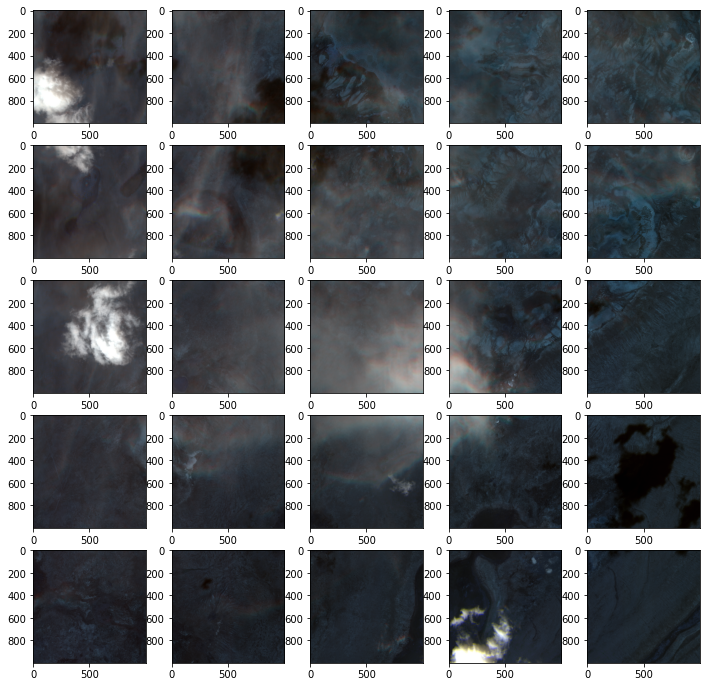

In [53]:
confirm_patch(train_save_path,75)

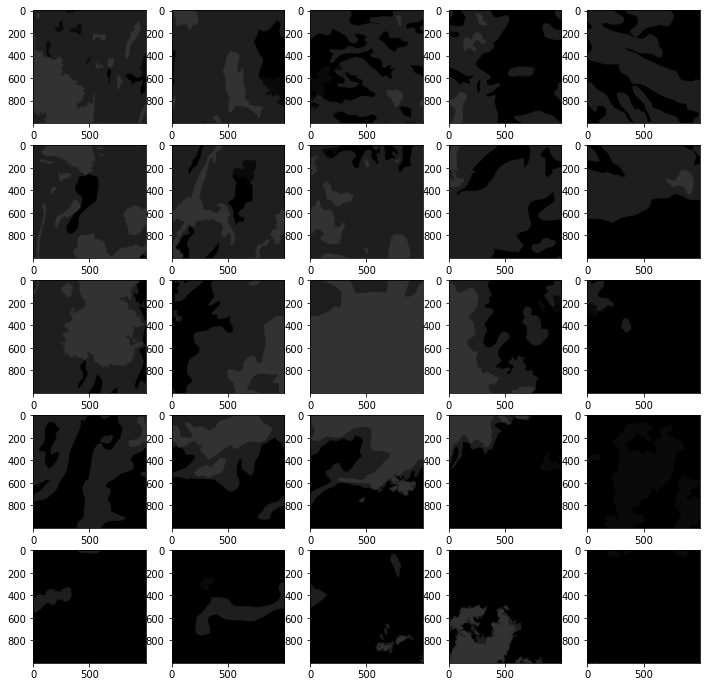

In [54]:
confirm_patch(train_label_save_path,75)

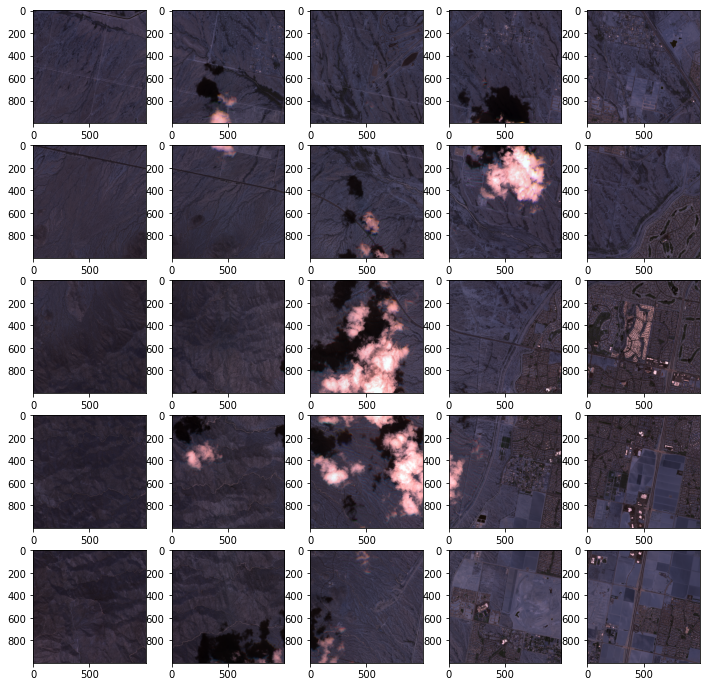

In [55]:
confirm_patch(validation_save_path,9)

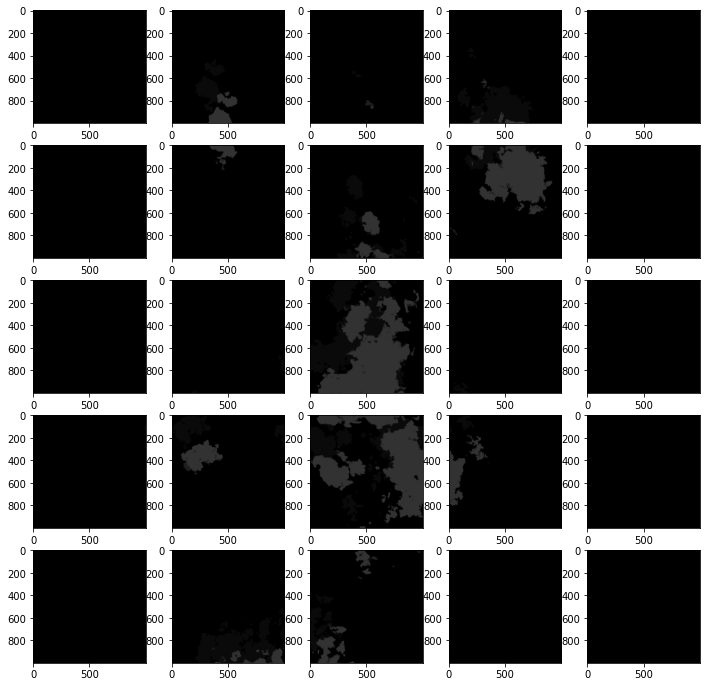

In [56]:
confirm_patch(validation_label_save_path,9)